In [1]:
# Standard library imports
import time
import os

# Third party library imports
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

plt.rcParams.update({'font.size': 12})

In [2]:
mat = scipy.io.loadmat(r"E:\داده کاوی\7 ۲۷دی\mnist.mat")
df_full = pd.concat((pd.DataFrame(data=mat['X']), pd.DataFrame(data=mat['y'])), axis=1)
df_full.columns = list(range(df_full.shape[1]-1)) + ['Class']
print(df_full.shape)
print('Positive class fraction: {:.3%}'.format(df_full.Class.mean()))

(7603, 101)
Positive class fraction: 9.207%


In [3]:
print(df_full.shape)
print('Positive class fraction: {:.3%}'.format(df_full.Class.mean()))

(7603, 101)
Positive class fraction: 9.207%


In [4]:
X_min = mat['X'].min().min()
X_max = mat['X'].max().max()

In [5]:
df_full = pd.concat((pd.DataFrame(data=mat['X']), pd.DataFrame(data=mat['y'])), axis=1)
df_full.columns = list(range(df_full.shape[1]-1)) + ['Class']

In [6]:
df_full = df_full.loc[:, df_full.var(axis=0) > 1E-6]
print(df_full.shape)

(7603, 79)


In [7]:
df_scaled = pd.concat(((df_full.iloc[:, :-1] - X_min)/(X_max - X_min), df_full.Class), axis=1)
df_scaled.columns = df_full.columns

In [8]:
df_scaled.columns

Index([      1,       2,       4,       5,       7,       8,       9,      10,
            11,      12,      13,      14,      15,      16,      17,      18,
            19,      20,      22,      23,      24,      25,      27,      29,
            30,      31,      32,      33,      34,      35,      36,      38,
            39,      41,      42,      43,      44,      45,      46,      47,
            48,      49,      51,      54,      55,      56,      57,      58,
            59,      62,      63,      64,      65,      66,      67,      68,
            69,      71,      73,      74,      75,      76,      77,      79,
            80,      81,      82,      83,      84,      85,      90,      92,
            93,      94,      95,      96,      97,      98, 'Class'],
      dtype='object')

C:\Users\ACER-PC\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ACER-PC\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ACER-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


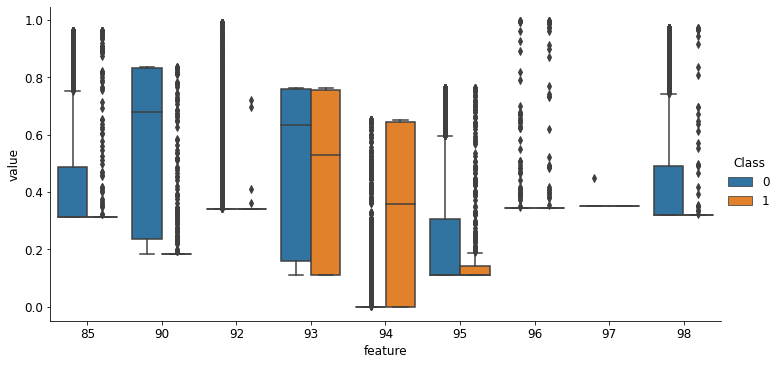

In [9]:
df_long = pd.melt(df_scaled.iloc[:, -10:], 
                  "Class", var_name="feature", value_name="value")
sns.factorplot("feature", hue="Class", y="value", data=df_long, kind="box", size=5, aspect=2)
plt.show();

In [10]:
X_mnist, y_mnist = df_full.loc[:, df_full.columns != 'Class'], df_full.Class
# with open(r"E:\داده کاوی\7 ۲۷دی","wb") as f:
#     np.save(f, X_mnist)
#     np.save(f, y_mnist)

## MAD

In [11]:
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 12})
from sklearn.metrics import (auc, average_precision_score, 
                              roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.preprocessing import StandardScaler, RobustScaler

In [12]:
def plot_metrics_curves(y_true, y_pred, title='',  **kwargs):
    """
    Plots roc and precision-recall curves
    
    Arguments
    =========
    y_true (iterator) : actual labels
    y_pred (iterator) : predicted labels
    title (str) : title for subplots
    **kwargs are for plt.plot()
    
    """
    x_roc, y_roc, _ = roc_curve(y_true, y_pred)
    y_prc, x_prc, _ = precision_recall_curve(y_true, y_pred)   
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[0].plot(x_roc, y_roc, color='darkorange', lw=2, 
                label='{}ROC curve (area {:.2f})'.format(title, roc_auc_score(y_true, y_pred)),
                            **kwargs)
    axs[1].plot(x_prc, y_prc, color='darkorange', lw=2, 
                label='{}PR curve (area {:.2f})'.format(title, average_precision_score(y_true, y_pred) ),
                            **kwargs)
    for ax, labels in zip(axs, (('FPR', 'TPR'), ('TPR (recall)', 'precision'))):
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel(labels[0])
        ax.set_ylabel(labels[1])
        ax.legend(loc="lower right")
    plt.show()

In [28]:
def plot_metrics_curves(y_true, y_pred, title='', label_extra='',  **kwargs):
    """
    Plots roc and precision-recall curves

    Arguments
    =========
    y_true (iterator) : actual labels
    y_pred (iterator) : predicted labels
    title (str) : title for subplots
    **kwargs are for plt.plot()

    """
    x_roc, y_roc, _ = roc_curve(y_true, y_pred)
    y_prc, x_prc, _ = precision_recall_curve(y_true, y_pred)

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[0].plot(x_roc, y_roc, color='darkorange', lw=2,
                label='{}ROC curve (area {:.2f})'.format(label_extra, roc_auc_score(y_true, y_pred)),
                            **kwargs)
    axs[1].plot(x_prc, y_prc, color='darkorange', lw=2,
                label='{}PRC curve (area {:.2f})'.format(label_extra, average_precision_score(y_true, y_pred)),
                            **kwargs)
    for ax, labels in zip(axs, (('FPR', 'TPR (recall)'), ('TPR (recall)', 'precision'))):
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel(labels[0])
        ax.set_ylabel(labels[1])
        ax.legend(loc="lower right")
    plt.suptitle(title + 'N={} (frac_pos={:.2%})'.format(len(y_true), y_true.mean()))
    plt.tight_layout(rect=(0.0, 0.0, 1.0, 0.9))
    plt.show()

In [29]:
def mad(X):
    """ calculates the median over the first axis, of the column-wise normalized 
    absolute deviation (normalized by iqr)
    """
    iqr =  np.quantile(X, 0.75, axis=0) - np.quantile(X, 0.25, axis=0)
    #the IQR may be zero. To avoid inf, fill with the variance
    iqr[np.where(iqr==0)] = np.var(X, axis=0)[np.where(iqr==0)] 
    return np.median(np.abs(X)/iqr, axis=1)

def generate_auc_ap_tuple(X, y):
    return roc_auc_score(y, mad(X)), average_precision_score(y, mad(X))

In [30]:
AUC_metrics_dict = {}; AUC_metrics_dict['MAD'] = [''] * 4
AP_metrics_dict = {}; AP_metrics_dict['MAD'] = [''] * 4

In [31]:
print('Total number of point: {}. Number of positives: {} (fraction: {:.2%})'.format(len(y_mnist),
                                                                                     y_mnist.sum(), y_mnist.mean()))

Total number of point: 7603. Number of positives: 700 (fraction: 9.21%)


In [1]:
print('MAD (full dataset), AUC: {:.3f}, APR: {:.3f}'.format(*generate_auc_ap_tuple(X_mnist, y_mnist)))

In [2]:
# auc, ap = generate_auc_ap_tuple(X_mnist, y_mnist)
# print('MNIST:  AUC: {:.3f}, APR: {:.3f}'.format(auc, ap))
# AUC_metrics_dict['MAD'][3], AP_metrics_dict['MAD'][3] = np.round(auc, 2), np.round(ap, 2)

## Outlier Detection Part III: (Extended) Isolation Forest

In [3]:
# Standard library
import types
import time
import os
import pickle
from collections import Counter
from functools import wraps

#3rd party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import (auc, average_precision_score, 
                              roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
#import eif 
import seaborn as sns

# misc.
from blogutils import memotodisk, plot_metrics_curves, downsample_scale_split_df
plt.rcParams.update({'font.size': 13})

In [4]:
@memotodisk
def iforest_outlier_predictor(X, n_jobs=2, **kwargs):
    """ Takes an X-array and returns outlier scores
    """
    t0 = time.perf_counter()
    ifo = IsolationForest(n_jobs=n_jobs, **kwargs)
    y = - ifo.fit(X).decision_function(X)
    t = time.perf_counter() - t0    
    return {'y': y, 't': t}

@memotodisk
def extended_iforest_outlier_predictor(X, **kwargs):
    red_kwargs = {k: v for k, v in kwargs.items() if k != 'random_state'}
    t0 = time.perf_counter()
    ext_ifo = eif.iForest(X, ExtensionLevel=0, **red_kwargs)
    y = ext_ifo.compute_paths(X_in=X)
    t = time.perf_counter() - t0    
    return {'y': y, 't': t}